# Regression Assingment Joyn

In [61]:
# importing libraries and modules for the assingment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [4]:
# importing the data into panda dataframe
raw_housing = pd.read_csv('Housing.csv')

In [5]:
# checking the kind of data we have
raw_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# converting categorical data to numerical ones using pandas one-hot encoding function
housing = pd.get_dummies(raw_housing, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus'], drop_first=True)

In [7]:
housing

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [8]:
# exploring the overall information in the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    uint8
 7   guestroom_yes                    545 non-null    uint8
 8   basement_yes                     545 non-null    uint8
 9   hotwaterheating_yes              545 non-null    uint8
 10  airconditioning_yes              545 non-null    uint8
 11  prefarea_yes                     545 non-null    uint8
 12  furnishingstatus_semi-furnished  545 non-null    u

In [11]:
# checking if there are any null values (missing), which we can drop or fill through average values
housing.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [12]:
# finding the mean, min etc. in the data
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.858716,0.177982,0.350459,0.045872,0.315596,0.234862,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.348635,0.382849,0.477552,0.209399,0.465180,0.424302,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


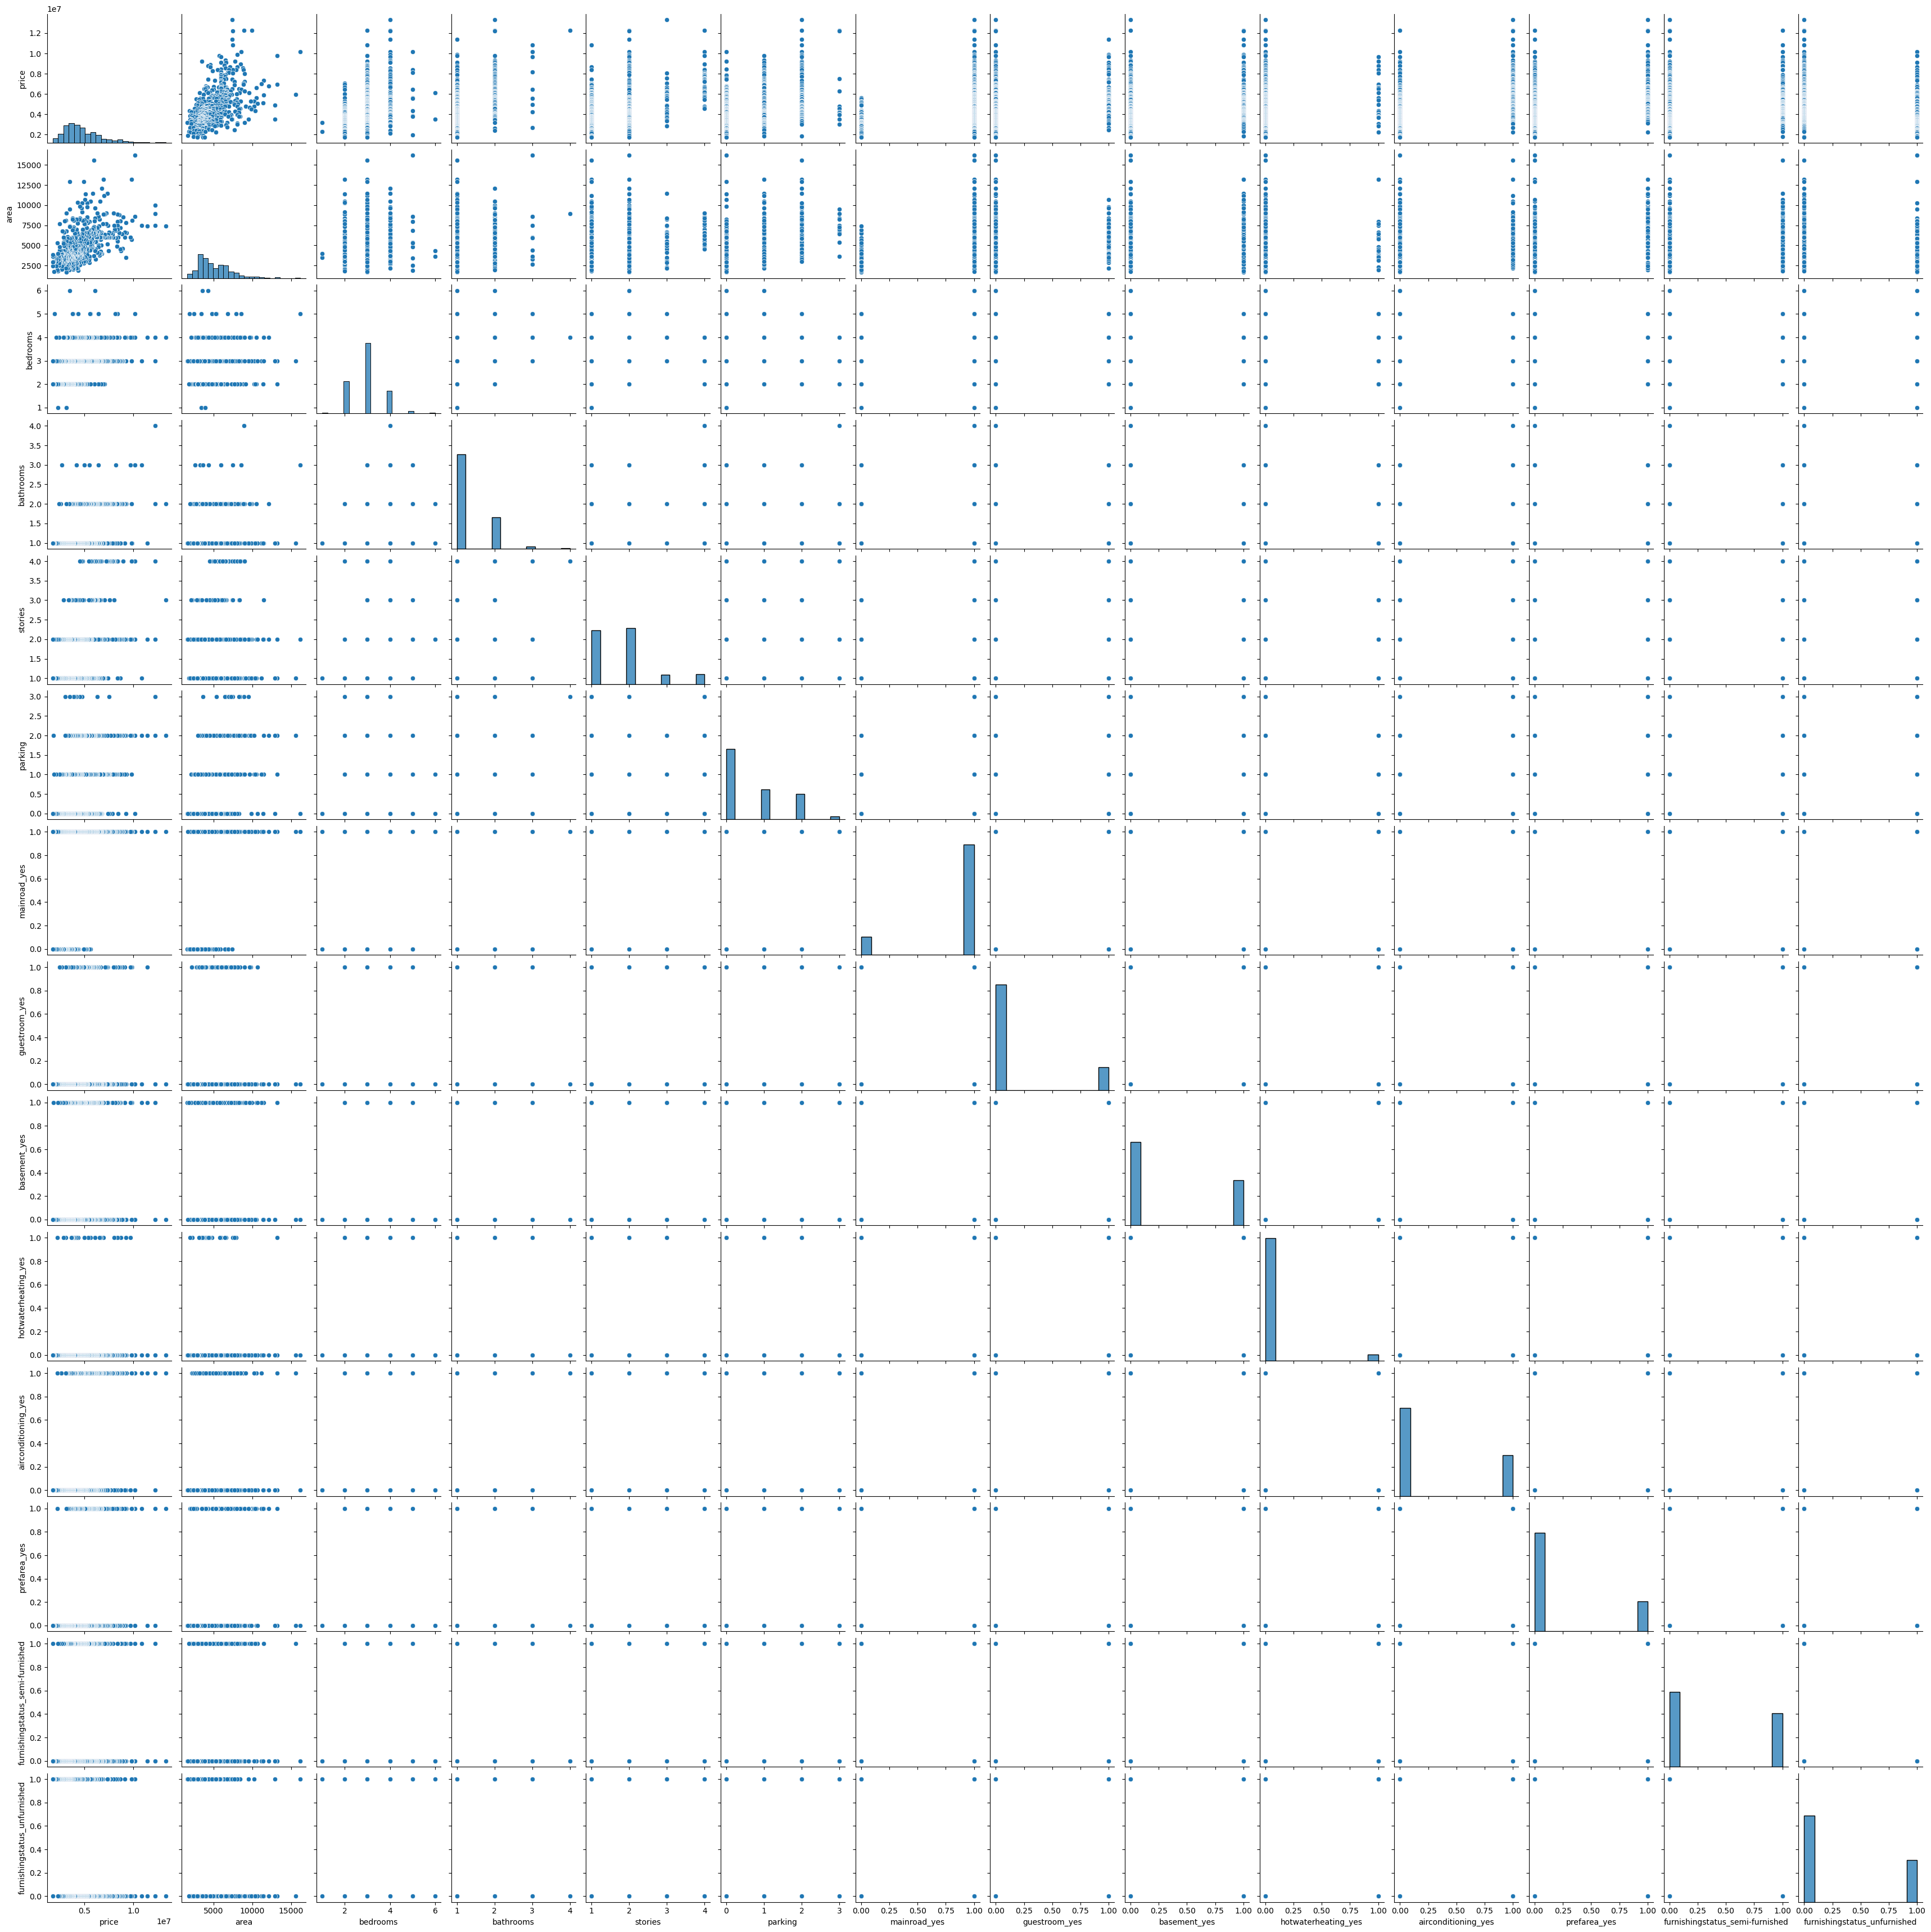

In [13]:
# find quick correlation scatter plots between columns
sns.pairplot(housing)

<Axes: xlabel='price', ylabel='Density'>

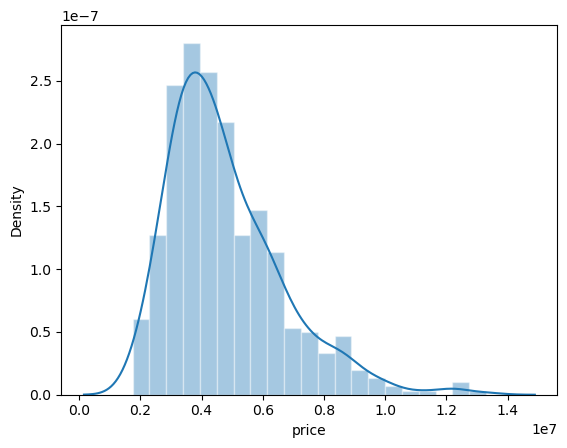

In [53]:
# since we are making prediction for the price, we find price distribution
sns.histplot(housing['price'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

<Axes: >

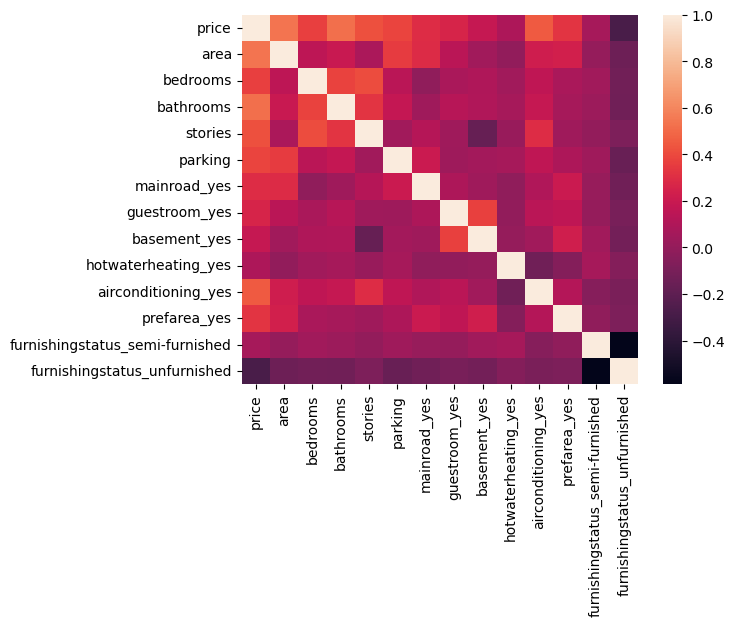

In [15]:
# viewing the data through a heatmap to provide better visualization
sns.heatmap(housing.corr())

In [9]:
# performing feature engineering, we can also add new features
# adding price_per_area column
housing['price_per_area'] = housing['price'] / housing['area']

In [10]:
# creating total_amenities column that will help us reduce dimensionality and potentially improve model performance
amenity_columns = ['mainroad_yes','guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes','prefarea_yes']
housing['total_amenities'] = housing[amenity_columns].sum(axis=1)

# dropping the other columns
columns_to_drop = ['mainroad_yes','guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes','prefarea_yes']
housing.drop(columns=columns_to_drop, inplace=True)

housing.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_area,total_amenities
0,13300000,7420,4,2,3,2,0,0,1792.452830,3
1,12250000,8960,4,4,4,3,0,0,1367.187500,2
2,12250000,9960,3,2,2,2,1,0,1229.919679,3
3,12215000,7500,4,2,2,3,0,0,1628.666667,4
4,11410000,7420,4,1,2,2,0,0,1537.735849,4


<Axes: >

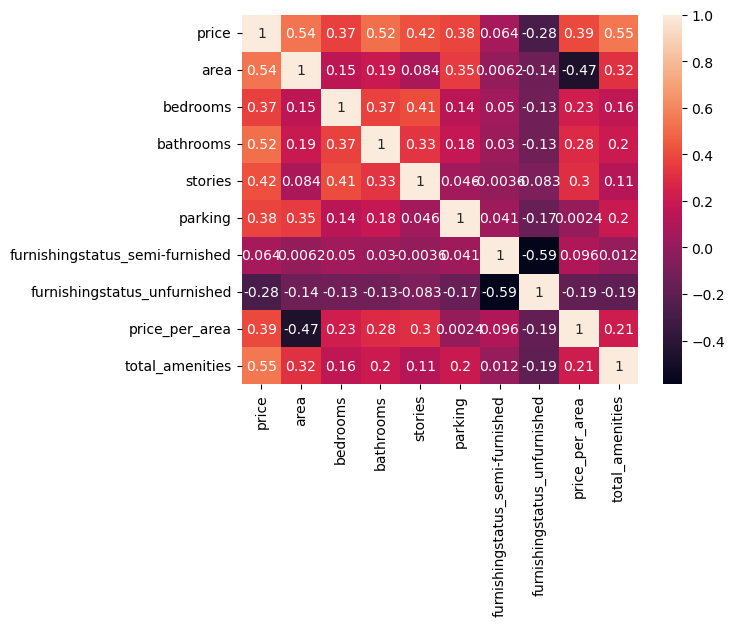

In [18]:
# viewing the data through a heatmap to provide better visualization
sns.heatmap(housing.corr(), annot=True)

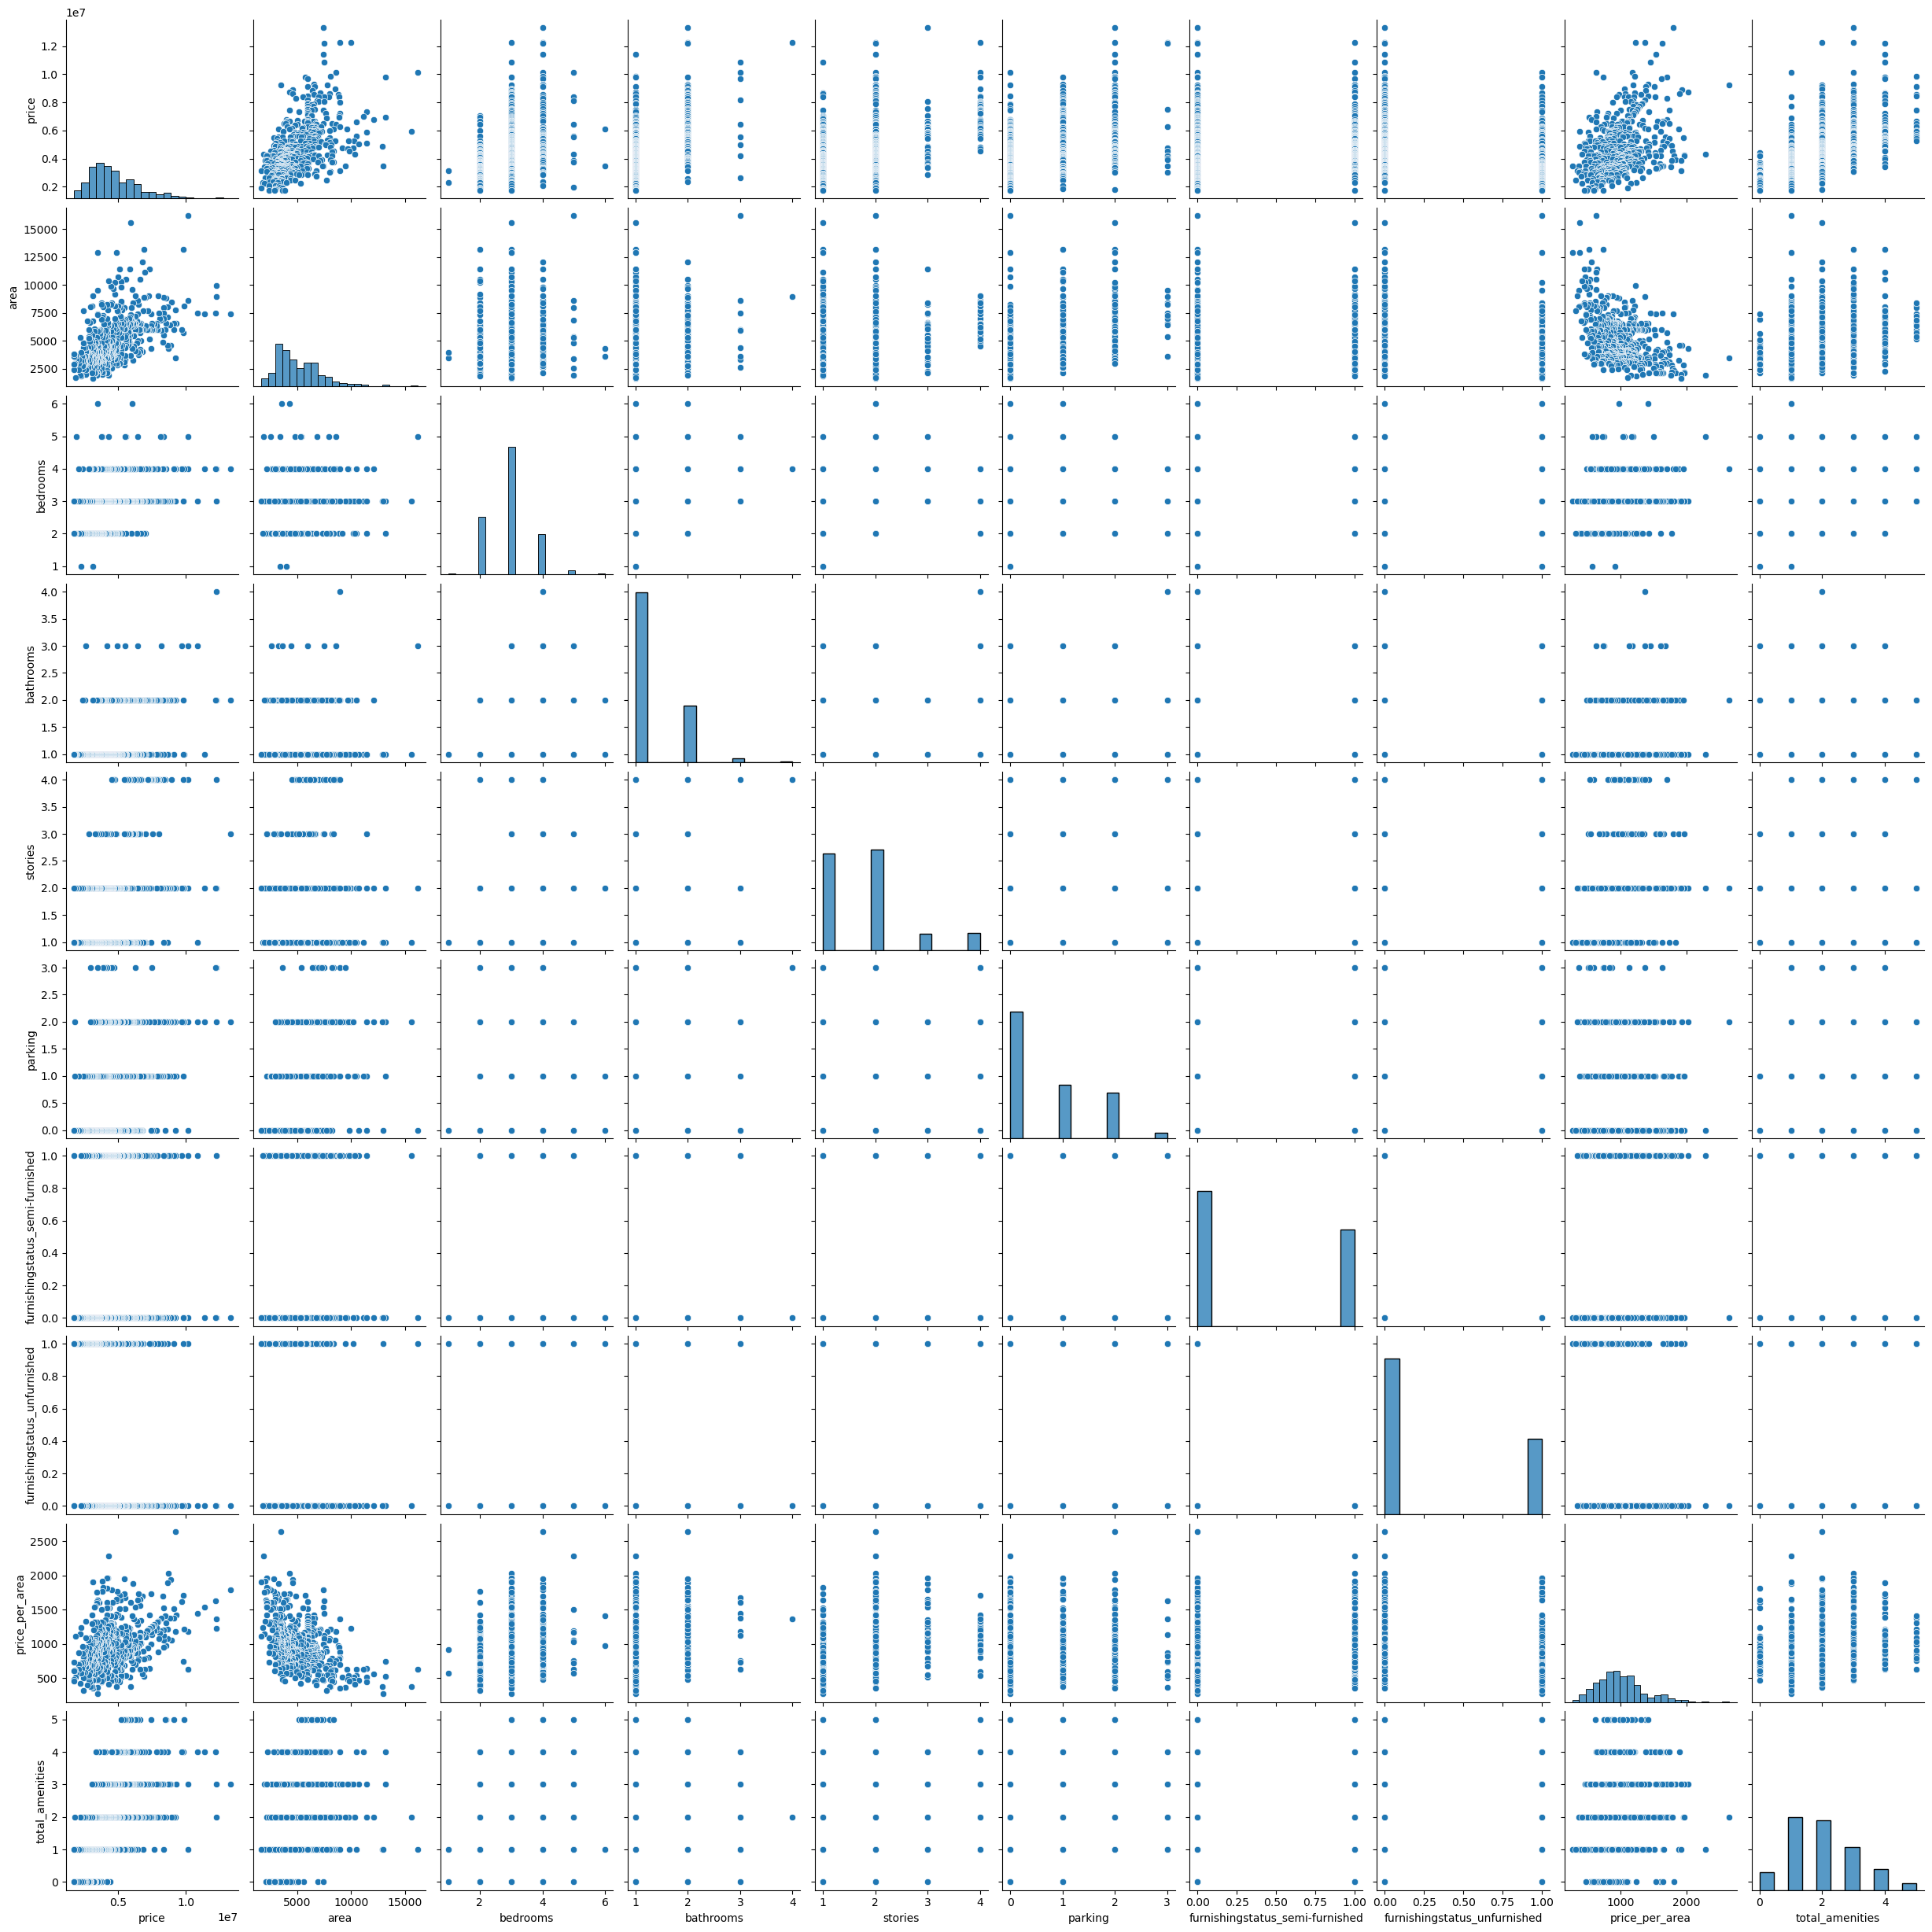

In [19]:
# find quick correlation scatter plots between the new columns
sns.pairplot(housing)

### Feature Scaling

In [20]:
# now lets perform standardization if we want to use pytorch linear regression

selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus_semi-furnished', 
                    'furnishingstatus_unfurnished', 'price_per_area', 'total_amenities']

X = housing[selected_features]
y = housing['price'].values

# using sci-learn to split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=369)


In [22]:
# applying scaling to the model
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building the Model

In [30]:
# calling the instance
regressor = LinearRegression()

# training the model
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
# making predictions 
y_pred = regressor.predict(X_test)

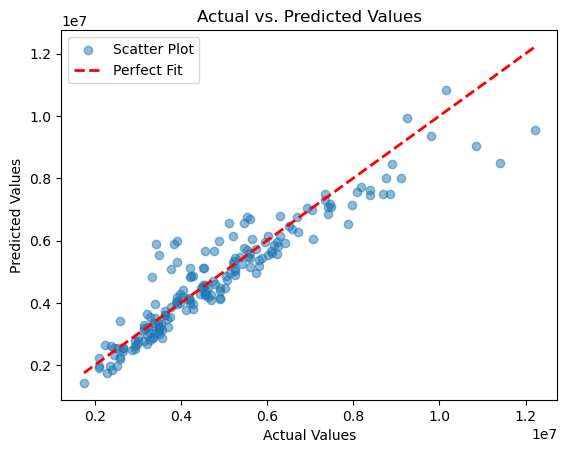

In [41]:
# scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, label='Scatter Plot')

# red line representing a perfect fit (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

### Evaluating the Model

In [50]:
# analyzing the performance of the machine learning model

print('Root Mean Squared Error (RMSE): ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 Score: ' + str(np.sqrt(r2_score(y_test, y_pred))))

Root Mean Squared Error (RMSE): 683054.6882052041
R2 Score: 0.9365700146209659


### Testing with XGBoost Regression

In [55]:
from xgboost import XGBRFRegressor

regressor_xg = XGBRFRegressor()
regressor_xg.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [57]:
y_pred_xg = regressor_xg.predict(X_test)

In [59]:
# analyzing the performance of the XGBoost model

print('Root Mean Squared Error (RMSE): ' + str(np.sqrt(mean_squared_error(y_test, y_pred_xg))))
print('R2 Score: ' + str(np.sqrt(r2_score(y_test, y_pred_xg))))

Root Mean Squared Error (RMSE): 632802.0049232885
R2 Score: 0.9458186024132337


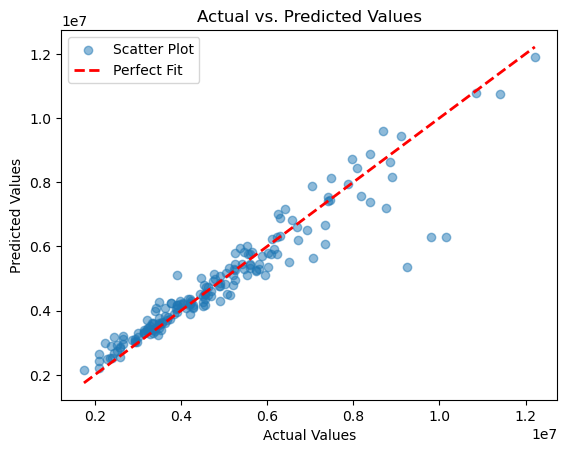

In [60]:
# scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_xg, alpha=0.5, label='Scatter Plot')

# red line representing a perfect fit (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

### Testing with RandomForest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train,y_train)
y_pred_rf = regressor_rf.predict(X_test)

In [63]:
# analyzing the performance of the RandomForest Model

print('Root Mean Squared Error (RMSE): ' + str(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print('R2 Score: ' + str(np.sqrt(r2_score(y_test, y_pred_rf))))

Root Mean Squared Error (RMSE): 531771.6831418897
R2 Score: 0.9620548626393592


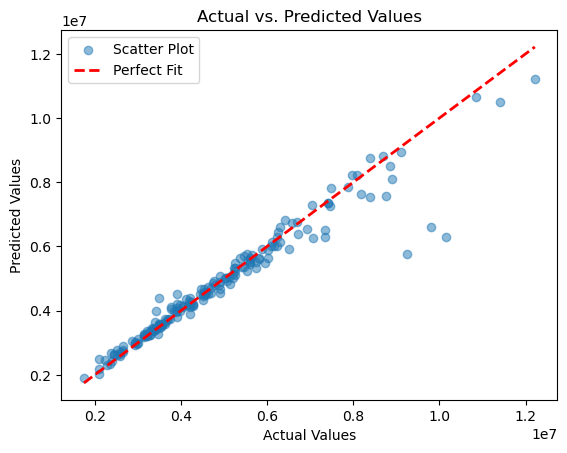

In [64]:
# scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Scatter Plot')

# red line representing a perfect fit (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

### We are having best results with Random Forest Regression Model